#RNA Coding Potential Prediction
Before we start, let's mount drive and import necessary libraries.

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

## Import Data
First, we import the data and read it to a Pandas DataFrame.

In [0]:
filename = "coding_potential.csv"
df = pd.read_csv(join(path_prefix, filename))
df.head()

,#ID,ORF-integrity,ORF-coverage,Instability,T2,C0,PI,ORF-length,AC,T0,G0,C2,A4,G2,TG,A0,TC,G1,C3,T3,A1,GC,T1,G4,C1,G3,A3,Gravy,Hexamer,C4,AG,Fickett,A2,T4,C,G,A,T,label
0,0.162071,1.0,0.114583,56.694764,576.0,0.000281,0.5279,0.369828,0.700535,7.877136,0.810020,0.233324,0.638334,-0.123038,0.102759,0.194765,0.116554,0.001970,0.334928,0.108390,0.451168,0.000844,0.994934,0.000563,1.000000,0.267380,0.553898,0.240642,0.839572,0.993808,0.995215,-0.704188,0.613566,0.152590,0.107545,0.353223,0.247959,0.244019,1
1,0.431156,1.0,0.086155,41.790444,1287.0,0.002011,0.5395,0.471515,0.717828,8.553284,0.786193,0.271783,0.732574,-0.285848,0.144485,0.237265,0.178344,0.000670,0.246649,0.118337,0.508713,0.000335,0.997319,0.001005,1.000000,0.236260,0.489611,0.291220,0.755697,0.997654,0.998324,0.368458,0.520107,0.115320,0.088166,0.232239,0.210456,0.262064,1
2,0.874798,1.0,0.081715,40.573639,1083.0,0.004850,0.9489,0.427648,0.752627,8.643616,0.773646,0.304770,0.689572,-0.408923,0.145631,0.202910,0.169903,0.001617,0.288601,0.125405,0.538399,0.000808,0.995958,0.002425,1.000000,0.230396,0.509297,0.302344,0.776071,0.995150,0.988682,0.496667,0.482619,0.100324,0.111650,0.243331,0.219887,0.247373,1
3,0.853372,1.0,0.081498,41.800543,1164.0,0.004402,0.9297,0.468819,0.765957,8.255188,0.802641,0.308144,0.732208,-0.388809,0.140969,0.203228,0.166667,0.001467,0.295671,0.142438,0.548789,0.000734,0.999266,0.002201,0.995598,0.238445,0.533382,0.279530,0.716801,1.000000,0.994864,0.393540,0.442406,0.110866,0.107930,0.222304,0.225238,0.256787,1
4,0.789583,1.0,0.080668,42.827804,1137.0,0.004170,0.8437,0.468381,0.762335,8.588196,0.774149,0.312022,0.726199,-0.347844,0.143950,0.199444,0.175939,0.001390,0.292564,0.138387,0.542043,0.000695,0.999305,0.002085,0.995830,0.234885,0.516331,0.282835,0.713690,1.000000,0.995136,0.525661,0.455177,0.109179,0.104312,0.223767,0.220987,0.261293,1


In the label column, 1 refers to coding RNA and 0 refers to non-coding RNA.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57523 entries, 0 to 57522
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   #ID            57523 non-null  float64
 1   ORF-integrity  57523 non-null  float64
 2   ORF-coverage   57523 non-null  float64
 3   Instability    57523 non-null  float64
 4   T2             57523 non-null  float64
 5   C0             57523 non-null  float64
 6   PI             57523 non-null  float64
 7   ORF-length     57523 non-null  float64
 8   AC             57523 non-null  float64
 9   T0             57523 non-null  float64
 10  G0             57523 non-null  float64
 11  C2             57523 non-null  float64
 12  A4             57523 non-null  float64
 13  G2             57523 non-null  float64
 14  TG             57523 non-null  float64
 15  A0             57523 non-null  float64
 16  TC             57523 non-null  float64
 17  G1             57523 non-null  float64
 18  C3    

##Split the Data
Now, we split the data into two folds, train and test (80% training, 20% test) with sklearn's train_test_split function.

In [0]:
# separate features and the target column
x = df.drop("label", axis=1)
y = df["label"]

from sklearn.model_selection import train_test_split
# 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [0]:
x_train

,#ID,ORF-integrity,ORF-coverage,Instability,T2,C0,PI,ORF-length,AC,T0,G0,C2,A4,G2,TG,A0,TC,G1,C3,T3,A1,GC,T1,G4,C1,G3,A3,Gravy,Hexamer,C4,AG,Fickett,A2,T4,C,G,A,T
52207,0.094059,1.0,0.109001,39.440000,228.0,0.004127,0.4973,0.486174,0.721832,8.495911,0.749071,0.196038,0.730499,-0.226000,0.116846,0.246389,0.118084,0.007429,0.286835,0.133361,0.471317,0.000413,0.999175,0.000825,0.997936,0.281469,0.540239,0.203879,0.789930,1.000000,0.997524,-0.172000,0.500619,0.159372,0.076383,0.279818,0.266199,0.248452
5545,0.452219,1.0,0.050873,67.036424,2721.0,0.000665,0.7486,0.468085,0.718584,5.090637,0.719082,0.195645,0.686170,-0.327398,0.121363,0.215259,0.119534,0.000166,0.260805,0.141812,0.417719,0.000332,1.000000,0.000499,0.998836,0.194814,0.495346,0.280253,0.813664,0.999335,0.999668,-0.837086,0.633477,0.140981,0.138155,0.305186,0.320645,0.204289
2635,0.422173,1.0,0.087414,32.585366,1725.0,0.000734,0.7080,0.424480,0.679559,6.577942,0.790208,0.142472,0.709180,-0.379093,0.111166,0.189474,0.126102,0.000245,0.337087,0.123898,0.383109,0.003427,0.995594,0.000490,1.000000,0.218360,0.581395,0.260955,0.787515,0.995349,0.995838,-0.086760,0.566707,0.129530,0.121694,0.328764,0.285435,0.235251
24534,0.435265,1.0,0.086530,40.926510,5685.0,0.000077,0.8248,0.452221,0.738361,6.422180,0.780245,0.230934,0.710873,-0.266893,0.128877,0.219678,0.137913,0.001685,0.279479,0.134696,0.460873,0.000153,0.999770,0.000230,0.999464,0.253828,0.540965,0.230704,0.774732,1.000000,0.999387,-0.234213,0.555972,0.149399,0.078184,0.287825,0.246095,0.269372
46462,0.295890,1.0,0.146978,42.601408,216.0,0.001372,0.5439,0.463649,0.743484,8.841980,0.809328,0.260631,0.702332,-0.121752,0.130495,0.182442,0.130495,0.004115,0.296296,0.140110,0.503429,0.002743,0.993141,0.009602,0.998628,0.320988,0.603567,0.161866,0.687243,0.990398,1.000000,-0.652113,0.451303,0.148352,0.031593,0.266118,0.181070,0.336077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.134279,1.0,0.054098,56.816049,246.0,0.005461,0.3937,0.476789,0.792463,7.719910,0.728017,0.228291,0.747133,-0.424383,0.133333,0.204806,0.137158,0.000546,0.280175,0.123497,0.547788,0.001092,0.997815,0.002731,1.000000,0.202622,0.498088,0.318951,0.749863,0.995085,0.997269,0.153086,0.491535,0.129508,0.137158,0.247952,0.270344,0.208083
38158,0.237097,1.0,0.051780,50.204167,147.0,0.014540,0.5460,0.504039,0.801292,8.630798,0.725363,0.221325,0.684976,-0.293169,0.124595,0.187399,0.118123,0.001616,0.232633,0.134304,0.487884,0.003231,0.998384,0.019386,1.000000,0.240711,0.460420,0.237480,0.817447,0.991922,0.995153,-0.652083,0.594507,0.173139,0.106796,0.319871,0.313409,0.208401
860,0.700905,1.0,0.122536,39.170342,1317.0,0.001065,0.8384,0.470714,0.744409,5.931458,0.780085,0.274228,0.735357,-0.198169,0.133724,0.199148,0.181673,0.004792,0.254526,0.113479,0.503727,0.000532,0.997870,0.002130,1.000000,0.286475,0.542599,0.235357,0.752396,0.998935,0.996805,0.422603,0.521299,0.111881,0.052211,0.291267,0.163472,0.314696
15795,0.601796,1.0,0.061151,41.391617,1005.0,0.001797,0.7386,0.493709,0.695027,8.721252,0.793889,0.200719,0.704014,-0.513935,0.108513,0.269023,0.117506,0.000599,0.225285,0.125899,0.447573,0.002397,0.985620,0.006591,1.000000,0.224086,0.484721,0.249850,0.785500,0.986219,0.983223,-0.087126,0.556022,0.167266,0.116906,0.298981,0.315758,0.210306


In [0]:
x_test

,#ID,ORF-integrity,ORF-coverage,Instability,T2,C0,PI,ORF-length,AC,T0,G0,C2,A4,G2,TG,A0,TC,G1,C3,T3,A1,GC,T1,G4,C1,G3,A3,Gravy,Hexamer,C4,AG,Fickett,A2,T4,C,G,A,T
26430,0.533288,1.0,0.096361,52.626044,2331.0,0.001144,0.8741,0.424256,0.640961,6.374451,0.792677,0.178490,0.695423,0.055637,0.124056,0.196110,0.142367,0.003432,0.307780,0.121309,0.396796,0.001373,1.000000,0.000229,0.999085,0.239130,0.554462,0.256293,0.830206,0.999771,0.999314,-0.550258,0.633638,0.130465,0.099336,0.362700,0.240732,0.263844
52743,0.242105,1.0,0.060071,1.627273,69.0,0.007042,0.8591,0.383803,0.690141,6.497498,0.760563,0.158451,0.672535,-0.140475,0.120141,0.204225,0.095406,0.003521,0.267606,0.137809,0.422535,0.017606,1.000000,0.010563,0.985915,0.186620,0.510563,0.278169,0.823944,0.982394,0.922535,0.654545,0.609155,0.151943,0.137809,0.330986,0.330986,0.204225
13126,0.513849,1.0,0.087608,39.083445,1614.0,0.001274,0.6581,0.428344,0.732166,6.275085,0.774841,0.163057,0.649682,-0.374886,0.134119,0.165924,0.137942,0.004140,0.268153,0.108633,0.416242,0.000637,0.994268,0.000318,1.000000,0.233439,0.567834,0.289172,0.797771,0.994586,0.992994,0.584916,0.578344,0.112775,0.110226,0.347771,0.241720,0.235669
14991,0.482117,1.0,0.130456,74.286575,984.0,0.000980,0.6723,0.428922,0.719118,5.010925,0.759314,0.265686,0.687255,-0.223727,0.125061,0.204902,0.121138,0.007843,0.250000,0.125061,0.499020,0.000490,0.986275,0.002451,1.000000,0.311765,0.482353,0.188725,0.818627,0.990196,0.989706,-1.014067,0.621078,0.168710,0.043158,0.364216,0.217647,0.281863
36893,0.355932,1.0,0.105263,23.466667,21.0,0.068966,0.9846,0.551724,0.810345,8.500061,0.775862,0.137931,0.724138,-0.471066,0.245614,0.241379,0.105263,0.034483,0.224138,0.087719,0.448276,0.051724,1.000000,0.017241,0.931034,0.258621,0.379310,0.362069,0.672414,0.965517,0.982759,0.816667,0.431034,0.157895,0.105263,0.206897,0.224138,0.155172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,0.478103,1.0,0.079077,42.587997,1845.0,0.000518,0.7554,0.403318,0.707880,8.182068,0.789787,0.221358,0.683774,-0.290513,0.134301,0.180404,0.127042,0.000778,0.296267,0.117708,0.444531,0.001037,0.995334,0.000259,1.000000,0.231985,0.577501,0.263867,0.782530,0.995594,0.994038,-0.406026,0.572317,0.132486,0.121338,0.290306,0.285899,0.218248
10822,0.386157,1.0,0.086930,55.735118,636.0,0.001215,0.6413,0.450790,0.735115,9.403748,0.725395,0.203524,0.717497,-0.096510,0.103343,0.191373,0.142857,0.004860,0.272175,0.128875,0.433171,0.000608,0.995747,0.012151,1.000000,0.244228,0.547388,0.226610,0.823208,0.996962,0.997570,-0.632227,0.555893,0.154407,0.075988,0.325638,0.260024,0.269137
40140,0.099391,1.0,0.075076,49.817442,261.0,0.001524,0.4777,0.461333,0.651810,10.864807,0.805333,0.224762,0.677714,-0.241729,0.134909,0.215238,0.132241,0.000381,0.295238,0.109756,0.430476,0.000762,0.999619,0.001143,1.000000,0.254476,0.594667,0.250286,0.822095,0.992000,0.994286,-0.427907,0.531048,0.154345,0.096418,0.262095,0.254857,0.240381
19136,0.743562,1.0,0.215897,59.350325,1386.0,0.007515,1.1388,0.439077,0.735373,7.591248,0.818035,0.209340,0.702093,-0.004766,0.095596,0.199678,0.122986,0.004294,0.336554,0.109023,0.470209,0.000537,0.992485,0.001610,1.000000,0.341385,0.577563,0.152979,0.787976,0.990875,0.991412,-0.542516,0.576490,0.141246,0.034909,0.329039,0.182501,0.323135


In [0]:
y_train

52207    0
5545     1
2635     1
24534    1
46462    0
        ..
54343    0
38158    0
860      1
15795    1
56422    0
Name: label, Length: 46018, dtype: int64

In [0]:
y_test

26430    1
52743    0
13126    1
14991    1
36893    0
        ..
5382     1
10822    1
40140    0
19136    1
40494    0
Name: label, Length: 11505, dtype: int64

##Train the Model
At this step, we create our Random Forest classifier and train it with the training splits we formed above.

In [0]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Training
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

##Evaluation
At the final step, we make our predictions both on the training and testing splits using our model. After that, we will evaluate our results by generating confusion matrices and classification reports.

In [0]:
#training predictions
from sklearn.metrics import confusion_matrix, classification_report

train_predictions = model.predict(x_train)

print('Train Classification report:')
print(classification_report(y_train, train_predictions))
print('')

Train Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19366
           1       1.00      1.00      1.00     26652

    accuracy                           1.00     46018
   macro avg       1.00      1.00      1.00     46018
weighted avg       1.00      1.00      1.00     46018




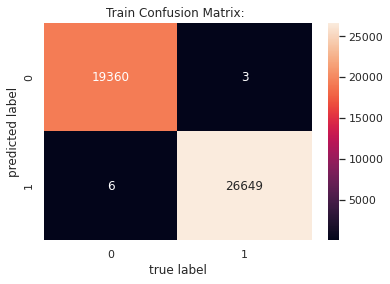

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
mat = confusion_matrix(y_train, train_predictions)
sns.heatmap(mat.T, annot=True, fmt='d')
plt.title('Train Confusion Matrix: ')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [0]:
test_predictions = model.predict(x_test)

print('Test Classification report:')
print(classification_report(y_test, test_predictions))
print('')

Test Classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4797
           1       0.99      0.98      0.98      6708

    accuracy                           0.98     11505
   macro avg       0.98      0.98      0.98     11505
weighted avg       0.98      0.98      0.98     11505




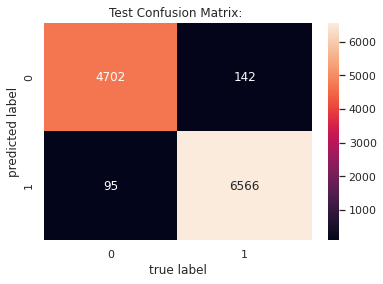

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
mat = confusion_matrix(y_test, test_predictions)
sns.heatmap(mat.T, annot=True, fmt='d')
plt.title('Test Confusion Matrix: ')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

##Answers

1. *How many rows and columns does the coding potential.csv have?*
  **57523 rows and 39 columns**
2. *When you split the data into segments, how many samples (rows) are in the training and test data?* **There are 46018 samples in the training data and 11505 samples in the test data**
3. *Report the confusion matrices and classification reports for the training and test data.* **The confusion matrices and classification reports can be found in the output of the code.**
4. *Explain what the confusion matrix describes.* **A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class, which are 0 and 1 in our case. For instance, it can be observed that our model were correct on 4702 instances and failed on wrong on 142 instances that it predicted 0.**
5. *What are precision, recall and F1-score?* 
*   **Recall can be defined as the ratio of the total number of correctly classified positive examples to the total number of positive examples. High recall indicates the class is correctly recognized. For example, the recall value for label 0 in our test prediction is 0.98, which means that 98 percent of the samples with label 0 are classified correctly.**
*   **Precision is the ratio of the total number of correctly classified positive examples to the total number of predicted positive examples. High precision indicates an example labelled as positive is indeed positive. For instance, the precision score for label 1 in our test prediction is 0.99, which indicates that 99 percent of the samples that are predicted as coding RNA's (label 1), are classified correctly.**
*   **F1-Score is the arithmetic mean of precision and recall values. Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them and ensures the balance between them.**

6. *Does the classifier perform better when predicting the training data or the test data targets?* **It performs better when predicting the training data targets.**
7. *Why is there a difference between the training and test prediction accuracies?* **Since the model learns from the training data, the training prediction should obviously be higher than the test prediction. It would be problematic if we had a huge difference between two prediction accuricies since it could mean that the model overfitted to the training split but the test accuracy is almost high as the training accuracy in our case.**